<a href="https://colab.research.google.com/github/davidvlaminck/AWVGeneric/blob/master/UseCases/PatternCollection/patroon_visualiseren.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Asset visualiseren o.b.v. een vast patroon

Achterliggend wordt gebruik gemaakt van de [EM-Infra API](https://apps.mow.vlaanderen.be/eminfra/core/swagger-ui/).

Lanceer via de play-knop 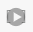
aan de linkerzijde achtereenvolgens ieder blokje code.

Activeer de blokjes één voor één en voer de instructies uit in volgorde.

Voer onderstaand code uit. Dit haalt code op en installeert packages.

In [ ]:
import os, shutil
import sys
if os.path.exists('AWVGeneric'):
  shutil.rmtree('AWVGeneric')
!git clone https://github.com/davidvlaminck/AWVGeneric.git
sys.path.insert(0, '/content/AWVGeneric')  # adds the Python files from the GitHub repo to the sys-path.

!pip install pyvis
!pip install more_itertools

## Parameters instellen
Haal een cookie op volgens [deze instructies](https://sites.google.com/mow.vlaanderen.be/em-infra/afspraken-conventies/awv-cookie-ophalen).
Vul deze hieronder in, en pas eventueel de filters aan.
Druk daarna op de play-knop

In [2]:
    cookie = '67f8bbadaade4e8487232ec815946e68'
    filter_dict = {
        'typeUri': 'https://wegenenverkeer.data.vlaanderen.be/ns/installatie#MIVModule',
        'naam' : 'MIV230'
    }

## Visualisatie genereren
Voer de code hieronder uit om
- de assets op te halen via de API, volgens het gecodeerde patroon
- een html visualisatie te genereren

Je kan de visualisatie in dit venster zien, of je kan de html downloaden, die links bij Bestanden staat.

In [ ]:
from API.Enums import AuthType, Environment
from AWVGeneric.UseCases.PatternCollection.Domain.PatternVisualiser import PatternVisualiser
from AWVGeneric.UseCases.PatternCollection.Domain.PyVisWrapper import PyVisWrapper
from IPython.display import HTML

syncer = PatternVisualiser(cookie=cookie, auth_type=AuthType.COOKIE, env=Environment.PRD)
pattern = [('uuids', 'of', 'a'),
           ('a', 'type_of', ['installatie#MIVModule']),
           ('a', '-[r1]-', 'b'),
           ('a', '-[r2]-', 'c'),
           ('a', '-[r2]-', 'e'),
           ('c', '-[r1]-', 'd'),
           ('b', 'type_of', ['onderdeel#Wegkantkast']),
           ('c', 'type_of', ['onderdeel#Netwerkpoort']),
           ('d', 'type_of', ['onderdeel#Netwerkelement']),
           ('e', 'type_of', ['installatie#MIVMeetpunt']),
           ('r1', 'type_of', ['onderdeel#Bevestiging']),
           ('r2', 'type_of', ['onderdeel#Sturing'])
           ]
chosen_assets = syncer.em_infra_client.get_assets_by_filter(filter=filter_dict)

syncer.collect_info_given_asset_uuids(asset_uuids=[x['@id'][39:75] for x in chosen_assets],
                                      asset_info_collector=syncer.collector, pattern=pattern)
print(f'Fetched {len(syncer.collector.collection.object_dict)} objects from the API')
PyVisWrapper().show(syncer.collector.collection.object_dict.values(), launch_html=False, notebook_mode=True)
HTML(filename="example.html")